# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [2]:
data = pd.read_csv("Admission_Predict.csv")
data.shape

(400, 9)

# Data summarization

In [3]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,NaN,NaN,4,4.5,4.5,9.65,1,0.92
1,2,312.0,107.0,4,4.0,4.5,8.87,1,0.76


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          399 non-null    float64
 2   TOEFL Score        399 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.3 KB


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,399.000000,399.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.619048,107.383459,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.391182,6.053848,1.143728,1.006869,0.898478,0.597325,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.167500,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.072500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            1
TOEFL Score          1
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Data Pre-processing


In [7]:
data.drop('Serial No.', axis=1, inplace=True)

In [8]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [9]:
X = data.iloc[:,:-1].values 
Y = data.iloc[:,7:].values  

In [10]:
print(X[:,:])

[[   nan    nan   4.   ...   4.5    9.65   1.  ]
 [312.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [321.   117.     4.   ...   4.     9.66   1.  ]]


# Filling misssing values with mode

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X[:, :3])
X[:, :3]= imputer.transform(X[:,:3]) 
print(X[0, :3])

[312. 110.   4.]


# Data Visualization 

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>, <Axes: title={'center': 'LOR'}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

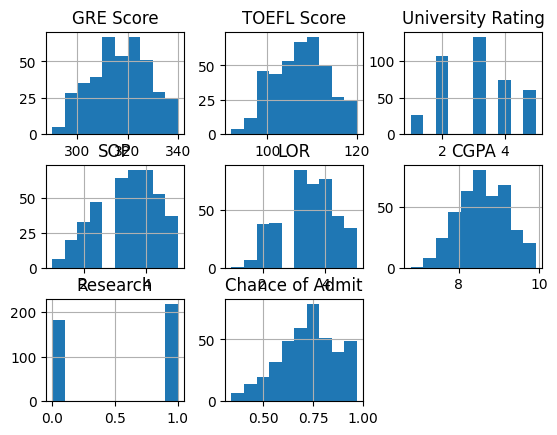

In [12]:
import matplotlib.pyplot as plt
data.hist()

In [13]:
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,399.000000
mean,316.619048
std,11.391182
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


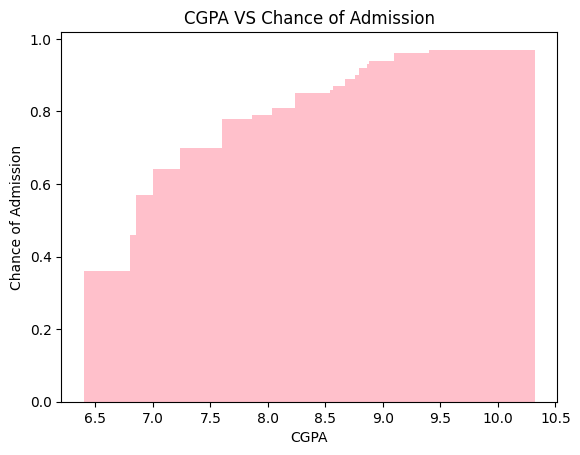

In [14]:
plt.bar(X[:,5], Y[:,0],color = "pink")
plt.title("CGPA VS Chance of Admission")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.show()

In [15]:
print(X)

[[312.   110.     4.   ...   4.5    9.65   1.  ]
 [312.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   116.     4.   ...   4.5    9.45   1.  ]
 [312.   103.     3.   ...   4.     8.78   0.  ]
 [321.   117.     4.   ...   4.     9.66   1.  ]]


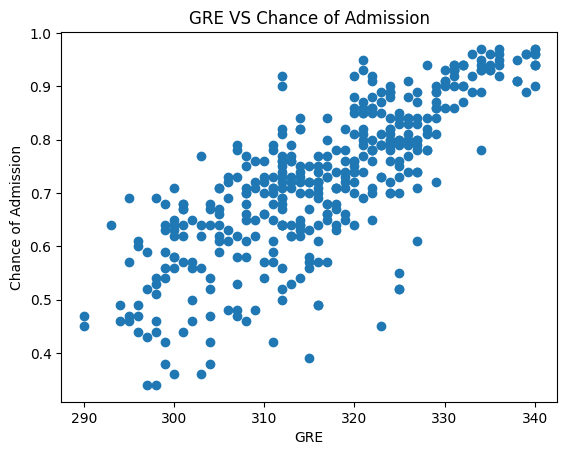

In [16]:
plt.scatter(X[:,0], Y)
plt.title("GRE VS Chance of Admission")
plt.xlabel("GRE")
plt.ylabel("Chance of Admission")
plt.show()

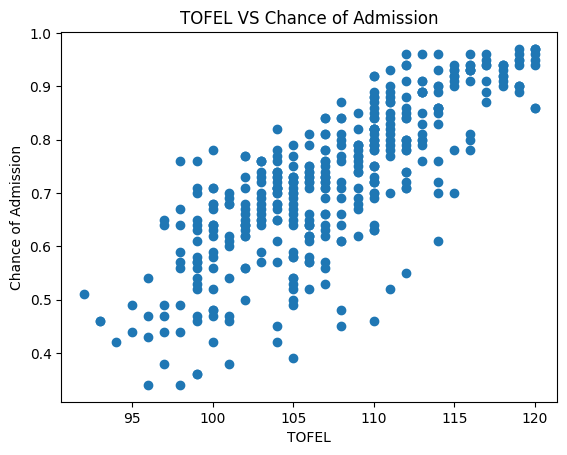

In [17]:
plt.scatter(X[:,1], Y)
plt.title("TOFEL VS Chance of Admission")
plt.xlabel("TOFEL")
plt.ylabel("Chance of Admission")
plt.show()

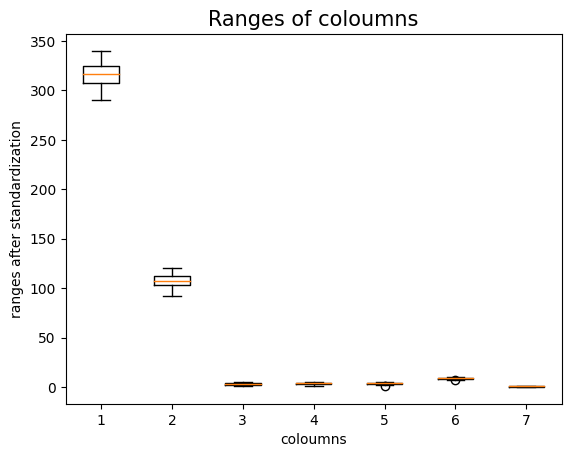

In [18]:
plt.boxplot(X[:,:])
plt.title('Ranges of coloumns',fontsize=15)
plt.xlabel("coloumns")
plt.ylabel("ranges after standardization")
plt.show()

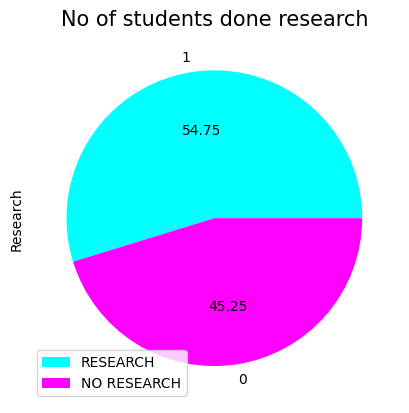

In [19]:
data['Research'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('No of students done research',fontsize=15)
plt.legend(['RESEARCH','NO RESEARCH'])
plt.show()

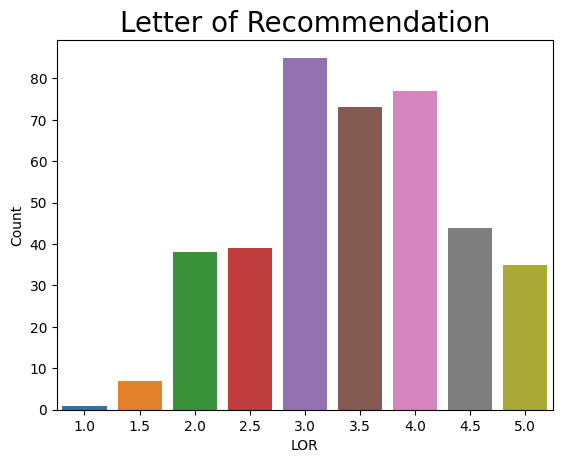

In [20]:
LOR = pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
sns.barplot(x = LOR.index, y = LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

# standardization

In [21]:
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  
X[:,:3]= st_x.fit_transform(X[:,:3])  

# MinMax Scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X[:,0:3]= scaler.fit_transform(X[:,0:3])
print(X[:,0:3])

[[0.44       0.64285714 0.75      ]
 [0.44       0.53571429 0.75      ]
 [0.52       0.42857143 0.5       ]
 ...
 [0.8        0.85714286 0.75      ]
 [0.44       0.39285714 0.5       ]
 [0.62       0.89285714 0.75      ]]


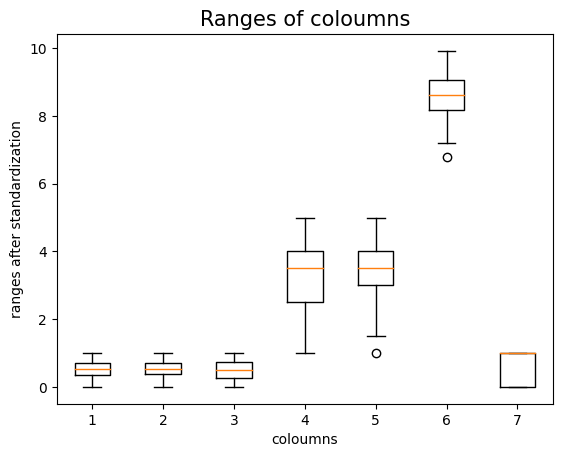

In [23]:
plt.boxplot(X[:,:])
plt.title('Ranges of coloumns',fontsize=15)
plt.xlabel("coloumns")
plt.ylabel("ranges after standardization")
plt.show()

# Saving processed dataset

In [24]:
arr = np.append(X, Y, axis=1)
col = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit ']
newdf = pd.DataFrame(arr, columns=col)
print(newdf.isnull().sum())
newdf.to_csv('cleaned.csv')

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [25]:
Y_1=[1 if each > 0.82 else 0 for each in Y]
Y = np.array(Y_1)

# Splitting Data into Train and Test

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=0) 


<h1> Testing the following algorithms </h1>
<ul>
    <li>
        <h3>Logistic Regression</h3>
        <p>Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).</p>
    </li>
    <li>
        <h3>Random Forest</h3>
        <p>Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. Random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.</p>
    </li>
    <li>
        <h3>Gaussian Navie Bayes</h3>
        <p>Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem.</p>
    </li>
    <li>
        <h3>Support Vector Classifiers(SVCs)</h3>
        <p>Support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting).</p>
    </li>
    <li>
        <h3>K-nearest Neighnours(KNN)</h3>
        <p>In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:</p>
        <ul>
            <li>In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.</li>
            <li>In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.</li>
        </ul>
    </li>
    
</ul>

# LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_logistic_pred= classifier.predict(x_test)

In [29]:
print('Train Score: ', classifier.score(x_train, y_train))  
print('Test Score: ', classifier.score(x_test, y_test))  

Train Score:  0.940625
Test Score:  0.9375


In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_logistic_pred))

[[60  1]
 [ 4 15]]


In [31]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_logistic_pred))
print("recall_score: ", recall_score(y_test, y_logistic_pred))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_logistic_pred))

precision_score:  0.9375
recall_score:  0.7894736842105263
f1_score:  0.8571428571428572


# ROC curve of logistic regression

In [32]:
from sklearn import metrics
metrics.plot_roc_curve(classifier, x_test, y_test)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

# SVC

In [33]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print("score: ", svm.score(x_test,y_test))

score:  0.9375


In [34]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_svm))
print("recall_score: ", recall_score(y_test, y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_svm))

precision_score:  0.9375
recall_score:  0.7894736842105263
f1_score:  0.8571428571428572


In [35]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_svm))

[[60  1]
 [ 4 15]]


# ROC curve of SVC

In [36]:
from sklearn import metrics
metrics.plot_roc_curve(svm, x_test, y_test)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

# RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred_RFC = RFC.predict(x_test)
print("score: ", RFC.score(x_test,y_test))

score:  0.9625


In [38]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_RFC))
print("recall_score: ", recall_score(y_test,y_pred_RFC))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_RFC))

precision_score:  0.9444444444444444
recall_score:  0.8947368421052632
f1_score:  0.918918918918919


In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_RFC))

[[60  1]
 [ 2 17]]


# ROC curve of Random forest classifier

In [40]:
from sklearn import metrics
metrics.plot_roc_curve(RFC, x_test, y_test)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

NAVIE BAYES


In [75]:
from sklearn.naive_bayes import MultinomialNB
gn = MultinomialNB()
gn.fit(x_train,y_train)
gn.fit(x_train, y_train)
y_pred_gn = gn.predict(x_test)
print("score: ", gn.score(x_test,y_test))


score:  0.7625


In [76]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_gn))
print("recall_score: ", recall_score(y_test,y_pred_gn))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_gn))

precision_score:  0.0
recall_score:  0.0
f1_score:  0.0


# Naive Bayes Classifiers

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy:",metrics.accuracy_score(y_test, y_pred_gnb))

Gaussian Naive Bayes model accuracy: 0.9375


In [42]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_gnb))
print("recall_score: ", recall_score(y_test,y_pred_gnb))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_gnb))

precision_score:  0.9375
recall_score:  0.7894736842105263
f1_score:  0.8571428571428572


In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,  y_pred_gnb))

[[60  1]
 [ 4 15]]


# ROC curve of  Naive Bayes Classifiers

In [44]:
from sklearn import metrics
metrics.plot_roc_curve(gnb, x_test, y_test)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

# KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN model accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

KNN model accuracy: 0.925


In [46]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_knn))
print("recall_score: ", recall_score(y_test,y_pred_knn))
from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_knn))

precision_score:  0.9333333333333333
recall_score:  0.7368421052631579
f1_score:  0.8235294117647058


In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,  y_pred_knn))

[[60  1]
 [ 5 14]]


# ROC curve of KNeighborsClassifier

In [48]:
from sklearn import metrics
metrics.plot_roc_curve(knn, x_test, y_test)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

# Accuracy for different values of K

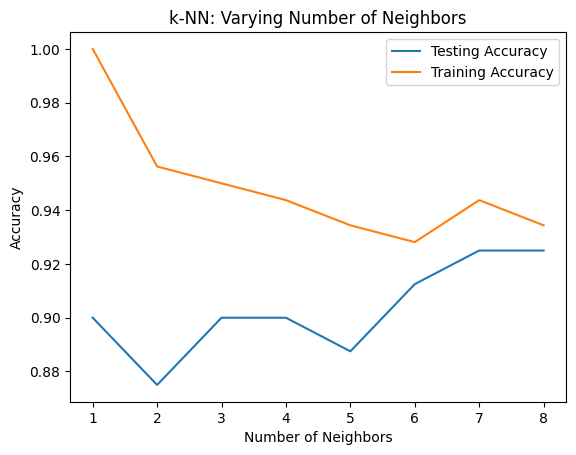

In [49]:
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# k-NN:time taken by Varying Number of K

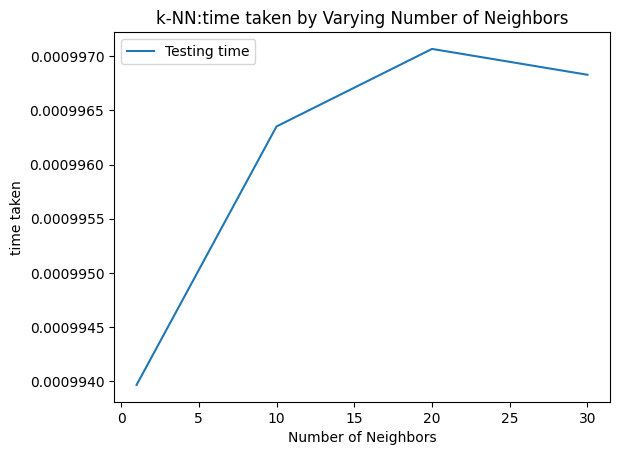

In [50]:
no_neighbors = [1,10,20,30]
time_taken = np.empty(len(no_neighbors))

import time
for i, k in enumerate(no_neighbors):
    start=time.time()
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    end=time.time()
    time_taken[i]=end-start

# Visualization of k values vs accuracy

plt.title('k-NN:time taken by Varying Number of Neighbors')
plt.plot(no_neighbors, time_taken, label = 'Testing time')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('time taken')
plt.show()

DECISION TREE USING CART MODEL

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred_clf = clf.predict(x_test)
print("score: ", clf.score(x_test,y_test))


score:  0.875


In [65]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test, y_pred_clf))
print("recall_score: ", recall_score(y_test,y_pred_clf))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, y_pred_clf))

precision_score:  0.7647058823529411
recall_score:  0.6842105263157895
f1_score:  0.7222222222222222


# CROSS VALIDATION SCORES

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
cross_val_score(LogisticRegression(),x_train,y_train)#average=0.93125

array([0.921875, 0.890625, 0.984375, 0.921875, 0.9375  ])

In [53]:
cross_val_score(SVC(),x_train,y_train)#average=0.928125

array([0.921875, 0.890625, 0.984375, 0.921875, 0.921875])

In [54]:
cross_val_score(RandomForestClassifier(),x_train,y_train)#average=0.946875

array([0.921875, 0.90625 , 1.      , 0.921875, 0.96875 ])

In [55]:
cross_val_score(GaussianNB(),x_train,y_train)#average=

array([0.921875, 0.890625, 0.9375  , 0.875   , 0.9375  ])

In [56]:
cross_val_score(KNeighborsClassifier(),x_train,y_train)#average=

array([0.9375  , 0.921875, 0.96875 , 0.921875, 0.90625 ])

In [67]:
cross_val_score(DecisionTreeClassifier(),x_train,y_train)#average=

array([0.9375  , 0.90625 , 0.9375  , 0.90625 , 0.890625])

# accuracy comparison of various algorithms

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


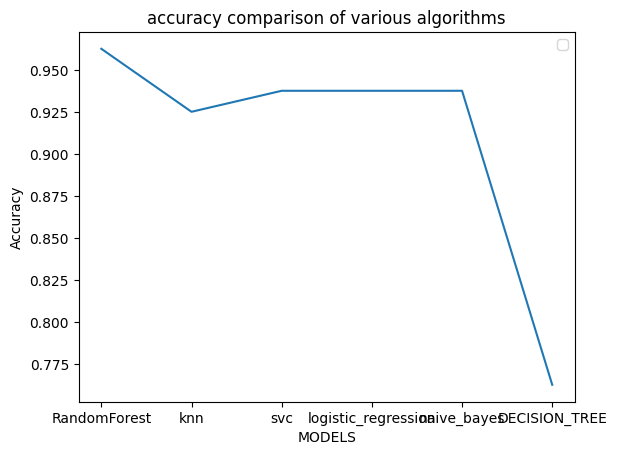

In [77]:
models=['RandomForest','knn','svc','logistic_regression','naive_bayes','DECISION_TREE']
accuracy=[metrics.accuracy_score(y_test, y_pred_RFC),metrics.accuracy_score(y_test, y_pred_knn),metrics.accuracy_score(y_test, y_pred_svm), metrics.accuracy_score(y_test,y_logistic_pred),metrics.accuracy_score(y_test,y_pred_gnb),metrics.accuracy_score(y_test,y_pred_clf)]
  
plt.title('accuracy comparison of various algorithms')
plt.plot(models, accuracy)
plt.legend()
plt.xlabel('MODELS')
plt.ylabel('Accuracy')
plt.show()

# So Random forest classifier is the best model

# saving RFC classifier model

In [ ]:
import pickle
with open("./college_predict.pkl", "wb") as f:
    pickle.dump(RFC, f)